---
title: Mengenal paket `quartomonothemer` untuk `ggplot2` dan `gt`
description: "Alternatif tema monotone untuk visualisasi data di R"
date: 2025-07-18 #Year-Month-Day
author: Deri Siswara
toc: true
---

## Pendahuluan

Dalam membuat presentasi atau laporan interaktif dengan **Quarto**, konsistensi tampilan sangat penting agar konten terlihat profesional. Paket **`quartomonothemer`** hadir untuk menyediakan tema monotone (satu warna dasar dengan aksen) yang mudah digunakan untuk. Paket ini dibuat oleh [Kazuya Nagimoto](kayuzhttps://github.com/kazuyanagimoto/quartomonothemer). Paket ini mendukung berbagai jenis output Quarto, seperti: 

- **Quarto Revealjs** (slide)
- **ggplot2** (grafik)
- **gt** (tabel)

Di artikel ini, kita akan melihat cara instalasi, konfigurasi, dan contoh penggunaan dengan data fiktif provinsi di Indonesia.

## Instalasi

Paket **`quartomonothemer`** tersedia di R-universe:``

```r
install.packages(
  "quartomonothemer",
  repos = "https://kazuyanagimoto.r-universe.dev"
)
````

Pastikan juga Anda menginstal paket pendukung:

```r
install.packages(c("showtext", "ggplot2", "gt", "dplyr", "forcats"))
```

In [ ]:
# Setup

library(dplyr)
library(ggplot2)
library(forcats)
library(gt)
library(gghighlight)
library(quartomonothemer)
library(showtext)

font_title <- "Josefin Sans"
font_text <- "Montserrat"
font_sans <- "Noto Sans" 
color_base <- "#009F8C"
color_base_light <- "#95DFD6"
color_accent <- "#B75C9D"
color_accent_light <- "#DBA6CC"
gray <- "#bebebe"
darkgray <- "#6d6d6d"

showtext_auto()

style_mono_quarto(
  font_title = font_title,
  font_text = font_text,
  font_sans = font_sans,
  color_base = color_base,
  color_accent = color_accent,
  color_link = color_accent,
  color_code = color_base,
  size_base = 30
)

Warning message:
"package 'gt' was built under R version 4.4.3"


## Visualisasi 1

In [22]:
# Data fiktif provinsi Indonesia
provinsi_data <- data.frame(
  provinsi = c("DKI Jakarta", "Jawa Barat", "Jawa Tengah", 
               "Jawa Timur", "Sumatera Utara", 
               "Sulawesi Selatan", "Kalimantan Timur", "Bali", 
               "Riau", "Sumatera Selatan"),
  populasi_juta = c(10.6, 48.3, 34.3, 39.7, 14.8, 8.9, 3.8, 4.3, 6.4, 8.5),
  pdb_per_kapita = c(275, 85, 65, 70, 95, 55, 180, 120, 150, 80),
  pulau = c("Jawa", "Jawa", "Jawa", "Jawa", "Sumatera", 
            "Sulawesi", "Kalimantan", "Bali", "Sumatera", "Sumatera"),
  kategori_ekonomi = c("Tinggi", "Sedang", "Rendah", "Sedang", "Sedang",
                       "Rendah", "Tinggi", "Tinggi", "Tinggi", "Sedang"),
  laju_pertumbuhan = c(5.2, 5.8, 5.1, 5.4, 4.9, 6.2, 3.8, 6.8, 4.2, 5.5)
)


Visualisasi pertama akan menggunakan paket **`ggplot2`** untuk membuat grafik provinsi dengan PDRB per kapita.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Montserrat' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Montserrat' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Montserrat' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Montserrat' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Montserrat' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Montserrat' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'Montserrat' not found, will use 'sans' instead"
W

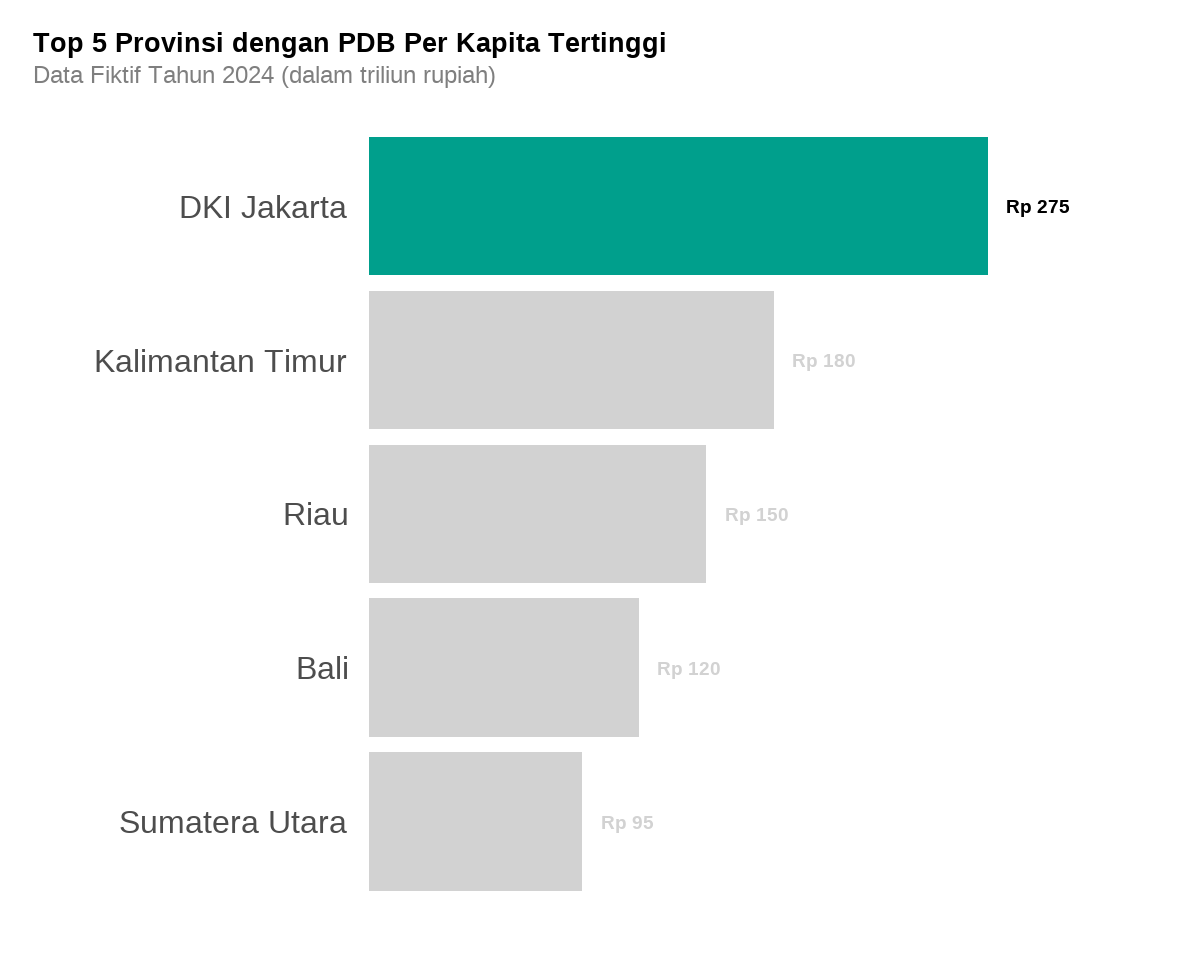

In [29]:
options(repr.plot.width = 10, repr.plot.height = 8)
provinsi_data |>
  arrange(pdb_per_kapita) |>
  slice_tail(n = 5) |>
  mutate(lbl = paste0("Rp ", pdb_per_kapita)) |>
  ggplot(aes(pdb_per_kapita, fct_reorder(provinsi, pdb_per_kapita))) +
  geom_col(fill = color_base) +
  geom_text(aes(label = lbl),
            hjust = 0, nudge_x = 8,
            size = 5, fontface = "bold", family = font_text) +
  scale_x_continuous(expand = expansion(mult = c(0, .2))) +
  labs(x = NULL, y = NULL, 
       title = "Top 5 Provinsi dengan PDB Per Kapita Tertinggi",
       subtitle = "Data Fiktif Tahun 2024 (dalam triliun rupiah)") +
  theme_quarto() +
  theme(panel.grid = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(size = 20, margin = margin(b = 5)),
        plot.subtitle = element_text(size = 18, color = "gray50"),
        plot.margin = margin(20, 40, 20, 20)) +
  gghighlight(provinsi == "DKI Jakarta")

## Visualisasi 2

Visualisasi kedua akan menggunakan paket **`gt`** untuk membuat tabel populasi.

In [37]:
# Install gtExtras jika belum ada
# install.packages("gtExtras")

# Load library yang diperlukan
library(gtExtras)

# Tabel populasi dengan visualisasi bar
gtf <-  provinsi_data |>
  arrange(desc(populasi_juta)) |>
  slice_head(n = 6) |>
  select(provinsi, populasi_juta, pulau) |>
  mutate(
    populasi_bar = populasi_juta
  ) |>
  gt() |>
  cols_label(
    provinsi = "Provinsi",
    populasi_juta = "Populasi (Juta Jiwa)",
    pulau = "Pulau",
    populasi_bar = "Visualisasi"
  ) |>
  fmt_number(columns = populasi_juta, decimals = 1) |>
  gt_plt_bar_pct(populasi_bar, fill = color_base, scaled = TRUE) |>
  tab_header(
    title = "Populasi Provinsi Terbesar di Indonesia",
    subtitle = "Data Fiktif Tahun 2024"
  ) |>
  opt_table_font(font = google_font(name = font_text)) |>
  gt_theme_quarto()

gt:::as.tags.gt_tbl(gtf)

Shiny tags cannot be represented in plain text (need html)